In [0]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv')

In [68]:
df.columns

Index(['rental_id', 'addr_unit', 'building_id', 'bedrooms', 'bathrooms',
       'size_sqft', 'created_at', 'addr_street', 'addr_city', 'addr_zip',
       'addr_lat', 'addr_lon', 'bin', 'bbl', 'floor_count', 'year_built',
       'min_to_subway', 'has_doorman', 'has_elevator', 'has_fireplace',
       'has_dishwasher', 'is_furnished', 'has_gym', 'allows_pets',
       'has_washer_dryer', 'has_garage', 'has_roofdeck', 'has_concierge',
       'has_pool', 'has_garden', 'has_childrens_playroom', 'rent', 'no_fee',
       'description', 'neighborhood', 'borough', 'unit', 'floornumber',
       'line'],
      dtype='object')

In [69]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

addr_unit          22
bin                 2
year_built         74
min_to_subway      16
rent             2000
neighborhood        1
unit               23
floornumber       246
line              614
dtype: int64

In [0]:
yb_mean = df['year_built'].mean()
df['year_built'].fillna(yb_mean, inplace=True)

In [71]:
null_cols = df['min_to_subway'].isnull()
null_min_to_subway = df[df["min_to_subway"].isnull()][null_cols]

#id = df[df["min_to_subway"].isnull()][null_cols]

print(null_min_to_subway)
#getting the zip codes from null_min_to_subway
zip_codes = null_min_to_subway['addr_zip']
print(zip_codes)
# addresses
addresses = null_min_to_subway['addr_street'] # null_min_to_subway['addr_zip']
print(addresses)

      rental_id addr_unit  building_id  ...  unit  floornumber  line
280     7466533       #6A     18772138  ...    6A          6.0     A
341     7476250       #3B     18732916  ...    3B          3.0     B
344     7437793       #1A     18742294  ...    1A          1.0     A
546     7469572       #8K     18732562  ...    8K          8.0     K
571     7439683       #5A     18758512  ...    5A          5.0     A
585     7475704      #37N     18732604  ...   37N         37.0     N
722     7462066       #2J     18772123  ...    2J          2.0     J
769     7498450       #2F     18758467  ...    2F          2.0     F
789     7490725       #1G     18742198  ...    1G          1.0     G
823     7500493       #12     18772111  ...    12          NaN   NaN
843     7459954       #2B     18772162  ...    2B          2.0     B
993     7478236      #2BB     18772162  ...   2BB          2.0    BB
1014    7510651      #205     18732718  ...   205          2.0    05
1338    7435813       #5B     1877

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
#replacing missing values
df.loc[df.index == 280, 'min_to_subway'] = '6'
df.loc[df.index == 341, 'min_to_subway'] = '4'
df.loc[df.index == 344, 'min_to_subway'] = '5'
df.loc[df.index == 546, 'min_to_subway'] = '9'
df.loc[df.index == 571, 'min_to_subway'] = '3'
df.loc[df.index == 585, 'min_to_subway'] = '4'
df.loc[df.index == 722, 'min_to_subway'] = '10'
df.loc[df.index == 769, 'min_to_subway'] = '8'
df.loc[df.index == 789, 'min_to_subway'] = '6'
df.loc[df.index == 823, 'min_to_subway'] = '12'
df.loc[df.index == 843, 'min_to_subway'] = '6'
df.loc[df.index == 993, 'min_to_subway'] = '6'
df.loc[df.index == 1592, 'min_to_subway'] = '1'
df.loc[df.index == 1551, 'min_to_subway'] = '4'
df.loc[df.index == 1338, 'min_to_subway'] = '2'
df.loc[df.index == 1014 , 'min_to_subway'] = '7'

In [0]:
df['min_to_subway'] = df['min_to_subway'].astype(np.int64)

In [74]:
df['min_to_subway'].max()

103343

In [0]:
#row = df.loc[df["min_to_subway"] == 59]
#addresses = row['addr_street']
#print(addresses)
#fixing outliers
df.loc[df.index == 182, 'min_to_subway'] = '2'
df.loc[df.index == 1746, 'min_to_subway'] = '2'
df.loc[df.index == 1274, 'min_to_subway'] = '5'
df.loc[df.index == 744, 'min_to_subway'] = '5'
df.loc[df.index == 1794, 'min_to_subway'] = '9'

**Predictive Power of Test3 Data**

In [0]:
# features:  bedrooms, bathrooms, min_to_subway, size_sqft
import seaborn as sns
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)

# make min_to_subway integer
df['min_to_subway'] = df['min_to_subway'].astype(int)

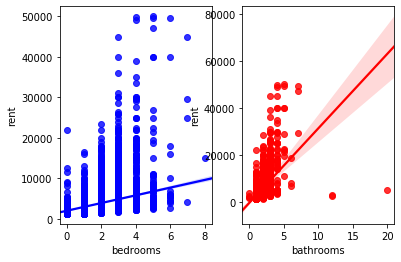

In [77]:
fig, axes = plt.subplots(1,2)

sns.regplot(x="bedrooms", y="rent", data=train_df, color="blue", ax=axes[0])
sns.regplot(x="bathrooms", y="rent", data=train_df, color="red", ax=axes[1])

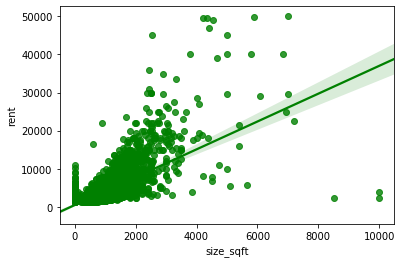

In [78]:
sns.regplot(x="size_sqft", y="rent", data=train_df, color="green")

**External Data Source - Restaurant Data**

In [79]:
restaurant_df = pd.read_csv('https://raw.githubusercontent.com/jhrbva/NYCRentPredictor/master/zip_df.csv')
restaurant_df.rename(columns={'Unnamed: 0':'Zipcode'}, inplace=True)
restaurant_df.head(5)

,Zipcode,Count
0,10103,62
1,11354,6689
2,10023,2458
3,11235,2569
4,10282,208


Join Test 3 data with restaurant data on zipcode

In [80]:
join_df = df.join(restaurant_df.set_index('Zipcode'), on='addr_zip')
join_df.head(5)

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,Count
0,7455565,#RR1,399352,4,2.0,1200.0,2018-08-08 11:39:21,287 HARMAN STREET,Brooklyn,11237,40.699847,-73.919288,3074845.0,3032790055,3.0,1931.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1,"4 Bed / 2.5 Bath in Bushwick, Brooklyn. Pets U...",Bushwick,Brooklyn,RR1,1.0,RR,3741
1,7473295,#2R,298804,1,1.0,800.0,2018-08-13 22:42:14,415 STUYVESANT AVENUE,Brooklyn,11233,40.679966,-73.931206,3047906.0,3016910003,2.0,1899.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NaN,1,Renovated and spacious 1 bedroom/1 bath with a...,Bedford-Stuyvesant,Brooklyn,2R,2.0,R,1076
2,7459804,#713,55336,0,1.0,525.0,2018-08-09 11:18:53,500 WEST 56 STREET,New York,10019,40.768101,-73.989700,1087635.0,1010840025,26.0,2002.000000,7,1,1,0,1,1,1,1,0,1,0,1,1,1,0,NaN,1,Monthly rental amount depending on the duratio...,Midtown West,Manhattan,713,7.0,13,9365
3,7456330,#4B,1251607,2,1.0,750.0,2018-08-08 13:33:13,39-44 24 STREET,Long Island City,11101,40.754183,-73.938745,4004757.0,4003940042,4.0,1920.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,Two bedroom apartment available September 1st ...,Long Island City,Queens,4B,4.0,B,4363
4,7443595,#3G,17965342,0,1.0,487.0,2018-08-04 15:00:41,50 EAST 28TH STREET,New York,10016,40.743698,-73.985100,1811087.0,1008570046,0.0,1936.547248,0,1,1,0,0,0,1,1,1,0,0,1,0,1,1,NaN,1,NO BROKER FEES. Prism at Park Avenue South is ...,Flatiron,Manhattan,3G,3.0,G,6722


**External Data Source - Parks Data**

In [81]:
park_df = pd.read_csv('https://raw.githubusercontent.com/jhrbva/NYCRentPredictor/master/parks_df.csv')
park_df.rename(columns={'Unnamed: 0':'Zipcode'}, inplace=True)
park_df.head(5)

,Zipcode,NumParks
0,11430,5
1,11414,1
2,10301,14
3,10314,4
4,10306,17


Joining Test 3 data and restuarant data with park counts on zipcode

In [82]:
join_df = join_df.join(park_df.set_index('Zipcode'), on='addr_zip')
join_df.head(5)

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,Count,NumParks
0,7455565,#RR1,399352,4,2.0,1200.0,2018-08-08 11:39:21,287 HARMAN STREET,Brooklyn,11237,40.699847,-73.919288,3074845.0,3032790055,3.0,1931.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1,"4 Bed / 2.5 Bath in Bushwick, Brooklyn. Pets U...",Bushwick,Brooklyn,RR1,1.0,RR,3741,NaN
1,7473295,#2R,298804,1,1.0,800.0,2018-08-13 22:42:14,415 STUYVESANT AVENUE,Brooklyn,11233,40.679966,-73.931206,3047906.0,3016910003,2.0,1899.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NaN,1,Renovated and spacious 1 bedroom/1 bath with a...,Bedford-Stuyvesant,Brooklyn,2R,2.0,R,1076,NaN
2,7459804,#713,55336,0,1.0,525.0,2018-08-09 11:18:53,500 WEST 56 STREET,New York,10019,40.768101,-73.989700,1087635.0,1010840025,26.0,2002.000000,7,1,1,0,1,1,1,1,0,1,0,1,1,1,0,NaN,1,Monthly rental amount depending on the duratio...,Midtown West,Manhattan,713,7.0,13,9365,2.0
3,7456330,#4B,1251607,2,1.0,750.0,2018-08-08 13:33:13,39-44 24 STREET,Long Island City,11101,40.754183,-73.938745,4004757.0,4003940042,4.0,1920.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,Two bedroom apartment available September 1st ...,Long Island City,Queens,4B,4.0,B,4363,NaN
4,7443595,#3G,17965342,0,1.0,487.0,2018-08-04 15:00:41,50 EAST 28TH STREET,New York,10016,40.743698,-73.985100,1811087.0,1008570046,0.0,1936.547248,0,1,1,0,0,0,1,1,1,0,0,1,0,1,1,NaN,1,NO BROKER FEES. Prism at Park Avenue South is ...,Flatiron,Manhattan,3G,3.0,G,6722,NaN


In [83]:
# fixing the NaN from NumParks Column - NaN meaning that there are no parks in the zipcodes of the apartment
join_df['NumParks'].fillna(0, inplace=True)
join_df['NumParks'] = join_df['NumParks'].astype(np.int64)
join_df.head(5)

,rental_id,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line,Count,NumParks
0,7455565,#RR1,399352,4,2.0,1200.0,2018-08-08 11:39:21,287 HARMAN STREET,Brooklyn,11237,40.699847,-73.919288,3074845.0,3032790055,3.0,1931.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1,"4 Bed / 2.5 Bath in Bushwick, Brooklyn. Pets U...",Bushwick,Brooklyn,RR1,1.0,RR,3741,0
1,7473295,#2R,298804,1,1.0,800.0,2018-08-13 22:42:14,415 STUYVESANT AVENUE,Brooklyn,11233,40.679966,-73.931206,3047906.0,3016910003,2.0,1899.000000,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,NaN,1,Renovated and spacious 1 bedroom/1 bath with a...,Bedford-Stuyvesant,Brooklyn,2R,2.0,R,1076,0
2,7459804,#713,55336,0,1.0,525.0,2018-08-09 11:18:53,500 WEST 56 STREET,New York,10019,40.768101,-73.989700,1087635.0,1010840025,26.0,2002.000000,7,1,1,0,1,1,1,1,0,1,0,1,1,1,0,NaN,1,Monthly rental amount depending on the duratio...,Midtown West,Manhattan,713,7.0,13,9365,2
3,7456330,#4B,1251607,2,1.0,750.0,2018-08-08 13:33:13,39-44 24 STREET,Long Island City,11101,40.754183,-73.938745,4004757.0,4003940042,4.0,1920.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,Two bedroom apartment available September 1st ...,Long Island City,Queens,4B,4.0,B,4363,0
4,7443595,#3G,17965342,0,1.0,487.0,2018-08-04 15:00:41,50 EAST 28TH STREET,New York,10016,40.743698,-73.985100,1811087.0,1008570046,0.0,1936.547248,0,1,1,0,0,0,1,1,1,0,0,1,0,1,1,NaN,1,NO BROKER FEES. Prism at Park Avenue South is ...,Flatiron,Manhattan,3G,3.0,G,6722,0


**TRAINING**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from google.colab import drive

%matplotlib inline

In [85]:
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)

In [87]:
train_df.head(5)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7236931,#22A,551248,4,3.0,1300.0,2018-06-04 16:31:06,645 OCEAN AVENUE,Brooklyn,11226,40.646982,-73.960065,3117619.0,3051240001,6.0,1929.0,3.3500,0,1,0,1,0,0,1,1,0,0,0,0,0,0,3925,1,MAGNIFICENT GUT RENOVATED 4 BEDROOM 3 BATHROOM...,Flatbush,Brooklyn,22A,NaN,NaN
7331920,#406,3373,0,1.0,475.0,2018-07-03 20:11:43,93 WORTH STREET,New York,10013,40.716599,-74.004799,1001883.0,1001737504,17.0,2014.0,3.2333,1,1,0,1,0,1,1,1,0,1,1,0,0,0,3350,0,Want to live in the hottest neighborhood in to...,Tribeca,Manhattan,406,4.0,06
7139224,#18A,70747,3,3.0,1886.0,2018-05-02 16:10:27,305 EAST 51 STREET,New York,10022,40.755402,-73.967598,1039676.0,1013440001,33.0,2013.0,3.0500,1,1,0,1,0,1,1,0,1,0,0,1,1,0,11500,0,"High floor totally renovated 3 bedrooms, 3 bat...",Midtown East,Manhattan,18A,18.0,A
7364827,#23E,42076,1,1.0,827.0,2018-07-13 16:06:55,70 WEST 37TH STREET,New York,10018,40.751301,-73.986298,1015919.0,1008380001,24.0,2019.0,2.0000,1,1,0,1,0,1,1,0,1,1,1,0,0,0,3772,1,**SHORT TERM LEASES AVAILABLE**\n\n****Photogr...,Midtown South,Manhattan,23E,23.0,E
7242151,#3B,319156,3,1.0,1200.0,2018-06-05 16:35:40,43 MAC DONOUGH STREET,Brooklyn,11216,40.681132,-73.944678,3053335.0,3018510053,4.0,1931.0,2.1333,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2595,1,This is a Huuge 3 bedroom apt. located in a pr...,Bedford-Stuyvesant,Brooklyn,3B,3.0,B


In [0]:
train_df = train_df.join(restaurant_df.set_index('Zipcode'), on='addr_zip')
train_df = train_df.join(park_df.set_index('Zipcode'), on='addr_zip')

In [0]:
# extract usable features
feature_cols = [
    'bedrooms', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'Count', 'NumParks'
]
train_features = train_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

In [90]:
#random forest regressor (1000 decision trees)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_target) # train the model on training data

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
train_labels = np.array(train_target)

In [0]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state = 42)

In [93]:
# test_features = test_df[feature_cols] 
# impute missing values with medians
# test_features = test_features.fillna(train_features.median(), axis=0)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# mean_squared_error(test_df['rent'], train_df['rent'])

Mean Absolute Error: 224.47 degrees.
Accuracy: 94.5 %.


In [94]:
master_df = train_df.append(test_df, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 94.5 %.


In [95]:
submit1_features = join_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
join_df['predictions'] = rf.predict(submit1_features)
join_df['predictions'].to_csv('submission1.csv', header=True)
!cp submission1.csv drive/My\ Drive/ #saving to drive
join_df['rents'] = np.ones(join_df['predictions'].shape) * master_target.median()
mean_squared_error(join_df['predictions'], join_df['rents'])

4589112.331324879

**Visualization**

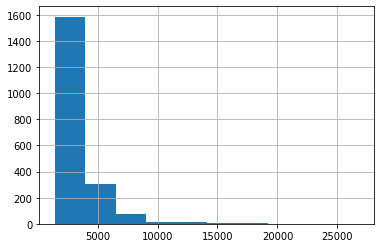

In [96]:
join_df['predictions'].hist(bins=10)